# 1. Install Dependencies and Setup

In [2]:
pip install --upgrade pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
 pip install  opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
applaunchservices                 0.3.0
appnope                           0.1.2
appscript                         1.1.2
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                   

In [6]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth

# List all the physical GPUs available to TensorFlow
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth on the GPU to True. This setting allows TensorFlow to start with a small amount of memory
# and allocate more as needed, rather than allocating a large block of memory upfront.

for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [9]:
import cv2 # For image processing
import imghdr # To determine the file type of images

/var/folders/n_/54f0rs_s0sg8bhd7tjw7hh1c0000gn/T/ipykernel_46859/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [11]:
data_dir = 'data' 

In [10]:
print(os.getcwd())

/Users/ashanksm/ImageClassification


In [12]:
# Print the contents of the data directory, listing all subfolders (image categories)
print(os.listdir(data_dir))

['happy', '.DS_Store', 'sad']


In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
# Loop over each category folder in the data directory
    # Loop over each image in the category folder
        # Construct the full path to the image

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
                        # Read the image using OpenCV
            img = cv2.imread(image_path)
            
                        # Use imghdr to determine the type of the image
            tip = imghdr.what(image_path)
            
                        # Check if the image type is not in the list of supported extensions
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/happy/images26.jpg
Issue with image data/happy/images32.jpg
Issue with image data/happy/e162ccda8ce0f197f8863f327add9233.jpg
Issue with image data/happy/05-12-21-happy-people.jpg
Issue with image data/happy/image22.jpeg
Issue with image data/happy/GettyImages-871518740-1024x707.jpg
Issue with image data/happy/7-principles-of-successful-and-happy-people.png
Issue with image data/happy/how-happy-are-healthy-people.jpg
Issue with image data/happy/physed-happiness-facebookJumbo.jpg
Issue with image data/happy/170404-happy-workers-feature.jpg
Issue with image data/happy/images33.jpg
Issue with image data/happy/images27.jpg
Issue with image data/happy/image18.jpeg
Issue with image data/happy/MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
Issue with image data/happy/images31.jpg
Issue with image data/happy/images25.jpg
Issue with image data/happy/Happy-people-raise-happy-kids-raise-yourself-first.jpg
Issue with image data/happy/images19.jpg
Issue with image data

NotADirectoryError: [Errno 20] Not a directory: 'data/.DS_Store'

# 3. Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Load the dataset using a utility function that automatically labels images based on the directory structure
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [16]:
# Convert the dataset into a Numpy iterator which allows iterating through the dataset in a memory-efficient way
data_iterator = data.as_numpy_iterator()

In [17]:
# Fetch the next batch of images from the iterator
batch = data_iterator.next()

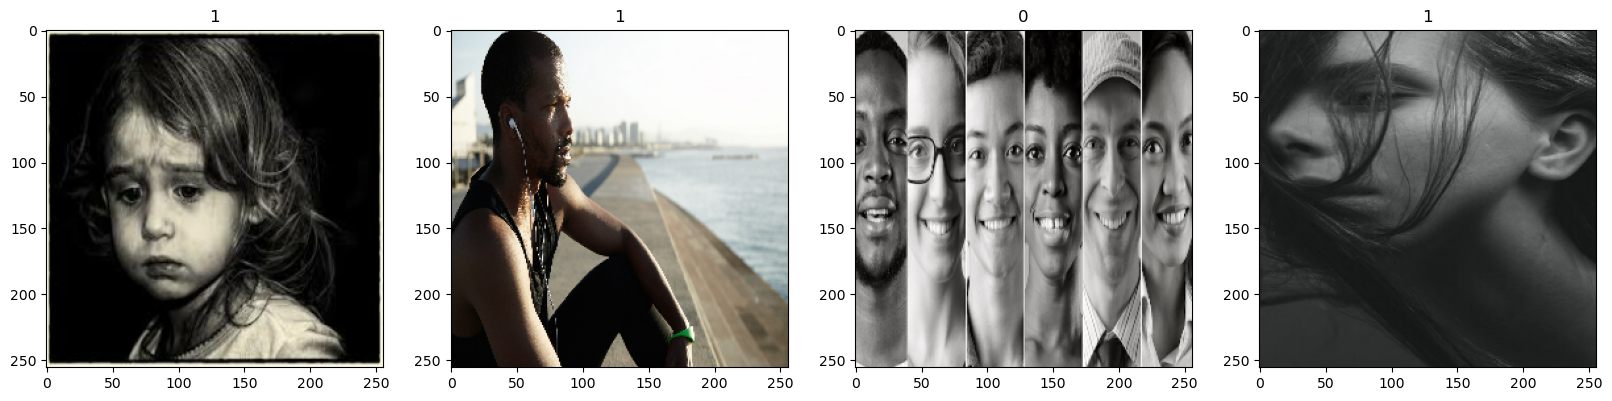

In [18]:
# Create a figure with 4 subplots arranged in one row, and set the size of the figure
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Loop through the first 4 images of the batch to display them
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# This code segment is useful for visual inspection of data to ensure images are loaded correctly 
    # and to understand class distribution visually

# 4. Scale Data
Normalization (x / 255):

What: Scales the image pixel values.
Why: Neural networks typically perform better and train faster with smaller, normalized input values. Normalizing the input data to a range between 0 and 1 ensures that the model is not biased towards input values with larger numeric ranges, which are common in image data.
How: By dividing each pixel value (originally an integer between 0 and 255) by 255, the resulting value is a float between 0 and 1.

In [19]:
# Apply scaling to each image in the dataset
# This lambda function takes two inputs, x (image data) and y (labels)
# It scales the pixel values of images from a range of 0-255 to 0-1 by dividing by 255.
# This normalization helps in the convergence of the model during training as it deals with smaller, normalized values.

data = data.map(lambda x,y: (x/255, y))

In [20]:
# Convert the dataset to a numpy iterator, and retrieve the first batch of scaled images and labels
# This is typically used to verify that the scaling and data loading are working as expected.
data.as_numpy_iterator().next()

# You can see the pixel values are now floats between 0 and 1 instead of integers between 0 and 255.

(array([[[[0.01176471, 0.03534007, 0.04719669],
          [0.01568628, 0.0627451 , 0.07843138],
          [0.0481924 , 0.25157782, 0.31591606],
          ...,
          [0.18777573, 0.929182  , 0.99215686],
          [0.1882353 , 0.93333334, 0.9882353 ],
          [0.18431373, 0.9372549 , 0.99215686]],
 
         [[0.01969975, 0.07455576, 0.0786152 ],
          [0.04313726, 0.1764706 , 0.21960784],
          [0.10795037, 0.51230085, 0.6407782 ],
          ...,
          [0.18408395, 0.929182  , 0.99215686],
          [0.18431373, 0.92941177, 0.99215686],
          [0.18431373, 0.93333334, 0.99215686]],
 
         [[0.08632047, 0.39644608, 0.4984528 ],
          [0.11372549, 0.5568628 , 0.69411767],
          [0.12987132, 0.6491268 , 0.8145221 ],
          ...,
          [0.18431373, 0.91764706, 0.9882353 ],
          [0.18431373, 0.91764706, 0.9882353 ],
          [0.18039216, 0.92156863, 0.9882353 ]],
 
         ...,
 
         [[0.14897366, 0.7058364 , 0.88235295],
          [0.14509

# 5. Split Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

7

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
# Import necessary modules from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
# Initialize a sequential model
model = Sequential()

Convolutional layers are effective for image processing as they capture the spatial hierarchies in images.
Pooling layers reduce the spatial dimensions of the output from convolutional layers, thereby reducing the number of parameters and computation in the network.
Dense layers are used to classify the features extracted by the convolutional and pooling layers.

In [27]:
# Add convolutional layers and pooling layers to the model
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))# First convolution layer with 16 filters
model.add(MaxPooling2D()) # Pooling layer to reduce dimensionality
model.add(Conv2D(32, (3,3), 1, activation='relu')) # Second convolution layer with 32 filters
model.add(MaxPooling2D()) # Another pooling layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten the output from the convolutional layers to feed into a dense layer
model.add(Flatten())

# Add a dense layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Output layer with one neuron per class, using a sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [30]:
# Set the directory where the logs will be stored. This is used by TensorBoard to visualize the training process.
logdir='logs'

In [31]:
# Create a TensorBoard callback instance which will be passed to the model during training.
# This allows you to monitor the model's performance metrics in TensorBoard.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
# Fit the model on the training data, specifying the number of epochs to train for and the validation data to use.
# The 'callbacks' parameter is used to pass in the TensorBoard callback for logging purposes.

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.5194 - loss: 0.7742 - val_accuracy: 0.6875 - val_loss: 0.6871
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.6876 - loss: 0.6791 - val_accuracy: 0.6094 - val_loss: 0.6444
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.6060 - loss: 0.6311 - val_accuracy: 0.6719 - val_loss: 0.5850
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.8261 - loss: 0.5278 - val_accuracy: 0.7188 - val_loss: 0.4956
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.8167 - loss: 0.4252 - val_accuracy: 0.8906 - val_loss: 0.3364
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.8647 - loss: 0.3113 - val_accuracy: 0.8750 - val_loss: 0.2888
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.9412 - loss: 0.1948 - val_accuracy: 0.9688 - val_loss: 0.1259
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.9542 - loss: 0.1587 - val_accuracy: 0.9375 - val_loss:

# 8. Plot Performance

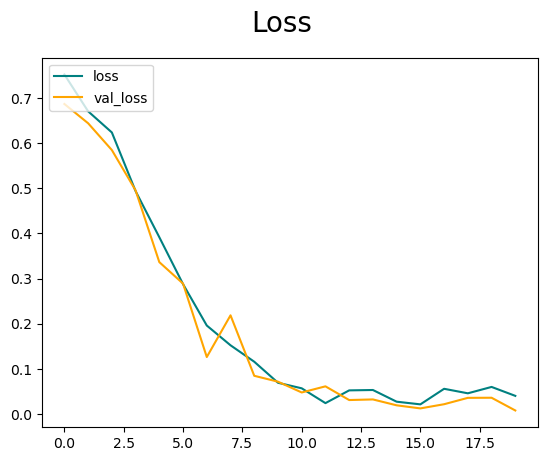

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

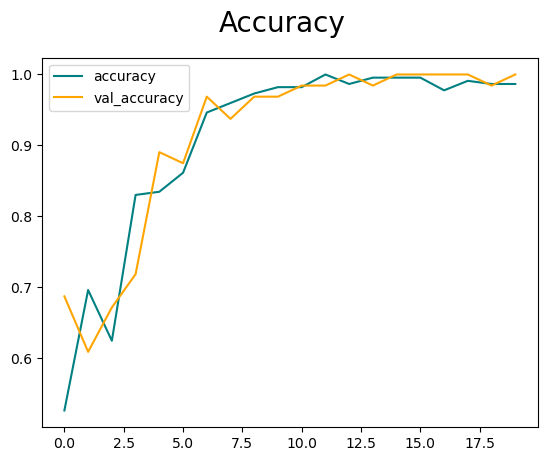

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


2024-05-10 15:31:36.916929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [39]:
import cv2

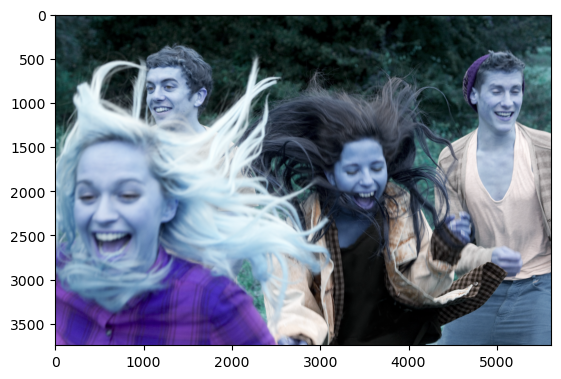

In [40]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

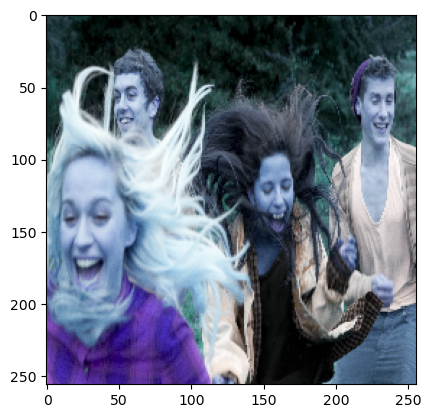

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [43]:
yhat

array([[0.00322993]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [45]:
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('imageclassifier.keras'))

In [52]:
new_model = load_model('imageclassifier.keras')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [53]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.00322993]], dtype=float32)